<a href="https://colab.research.google.com/github/ksranjith786/python/blob/master/MachineLearning/StockPrediction/StockPrediction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nsepy --upgrade

  Created wheel for nsepy: filename=nsepy-0.7-cp36-none-any.whl size=34388 sha256=863dd2d02fd1dc9482770e7226f4aee678f135b5a1b750883eb2d7145f81668e
  Stored in directory: /root/.cache/pip/wheels/88/89/1e/3dfa14f863314a42481d8926d9ef4825da5d899e026435fc3a
Successfully built nsepy


In [0]:
from nsepy import get_history
import datetime

In [0]:
stockHistory = get_history(symbol='HDFC', start=datetime.date(2015,1,1), end=datetime.date.today())

In [57]:
stockHistory

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,HDFC,EQ,1135.90,1130.00,1131.15,1120.10,1125.90,1124.00,1124.23,401576,4.514650e+13,11804,128793,0.3207
2015-01-02,HDFC,EQ,1124.00,1127.30,1176.95,1125.35,1171.05,1171.90,1159.93,2019816,2.342845e+14,59071,1258847,0.6232
2015-01-05,HDFC,EQ,1171.90,1168.80,1175.00,1150.40,1154.95,1156.40,1159.24,2219458,2.572880e+14,57749,1414720,0.6374
2015-01-06,HDFC,EQ,1156.40,1148.60,1148.60,1096.10,1098.00,1101.95,1117.84,2531748,2.830100e+14,81436,1547523,0.6112
2015-01-07,HDFC,EQ,1101.95,1097.50,1114.15,1095.00,1097.65,1099.25,1105.58,2406880,2.660992e+14,133109,1533304,0.6371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-25,HDFC,EQ,2237.30,2244.75,2297.00,2227.40,2294.00,2294.55,2276.50,4535037,1.032400e+15,146311,2645375,0.5833
2019-11-26,HDFC,EQ,2294.55,2300.00,2320.00,2280.95,2298.80,2304.65,2305.93,8808006,2.031062e+15,169206,6526754,0.7410
2019-11-27,HDFC,EQ,2304.65,2316.00,2352.00,2308.40,2336.00,2336.30,2331.64,5748946,1.340450e+15,225666,3625097,0.6306


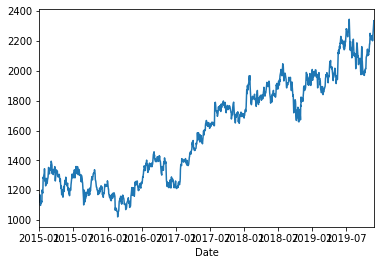

In [13]:
stockHistory['Close'].plot()

In [15]:
stockHistory.shape

(1213, 14)

In [17]:
stockHistory.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 2015-01-01 to 2019-11-29
Data columns (total 14 columns):
Symbol                1213 non-null object
Series                1213 non-null object
Prev Close            1213 non-null float64
Open                  1213 non-null float64
High                  1213 non-null float64
Low                   1213 non-null float64
Last                  1213 non-null float64
Close                 1213 non-null float64
VWAP                  1213 non-null float64
Volume                1213 non-null int64
Turnover              1213 non-null float64
Trades                1213 non-null int64
Deliverable Volume    1213 non-null int64
%Deliverble           1213 non-null float64
dtypes: float64(9), int64(3), object(2)
memory usage: 182.1+ KB


In [19]:
stockHistory.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1.213000e+03,1.213000e+03,1213.000000,1.213000e+03,1213.000000
mean,1593.797115,1595.710181,1611.231822,1577.570610,1594.426917,1594.754534,1594.099588,2.881056e+06,4.657436e+14,106729.929101,1.986793e+06,0.684474
std,342.510508,343.199881,344.925184,340.245187,342.804579,342.852482,342.708626,1.448041e+06,2.812311e+14,44238.239650,1.045554e+06,0.088164
min,1022.100000,1022.000000,1049.500000,1011.450000,1023.050000,1022.100000,1032.000000,1.102050e+05,1.522000e+13,3479.000000,3.758300e+04,0.287700
25%,1263.750000,1262.500000,1279.000000,1248.700000,1264.000000,1264.300000,1262.840000,1.947101e+06,2.900423e+14,75412.000000,1.275280e+06,0.637600
50%,1629.000000,1626.100000,1640.000000,1616.400000,1627.400000,1629.100000,1627.520000,2.585069e+06,3.998328e+14,99404.000000,1.768420e+06,0.692900
75%,1893.800000,1894.750000,1912.500000,1872.800000,1894.000000,1894.300000,1891.810000,3.451819e+06,5.700402e+14,131817.000000,2.408987e+06,0.745300
max,2345.150000,2339.000000,2357.850000,2308.400000,2338.000000,2345.150000,2332.670000,1.820364e+07,3.710496e+15,319341.000000,1.188380e+07,0.922600


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [0]:
#InputList = ['Open', 'Low', 'High', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']
InputList = ['Open', 'Low', 'High']
X = stockHistory[InputList]
y = stockHistory['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [47]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

               Open      Low     High  ...  Trades  Deliverable Volume  %Deliverble
Date                                   ...                                         
2019-09-03  2141.00  2083.00  2144.70  ...  162095             2517078       0.6278
2017-02-10  1408.00  1382.80  1410.00  ...   56809             1192367       0.7281
2018-10-03  1804.80  1785.65  1819.45  ...  144249             2754649       0.7233
2015-11-26  1222.00  1216.00  1231.95  ...  104856             1535838       0.6781
2019-11-06  2188.00  2162.00  2228.00  ...  170971             2157528       0.5106
...             ...      ...      ...  ...     ...                 ...          ...
2016-06-16  1198.00  1182.15  1205.80  ...  108127             1063519       0.5777
2017-11-13  1700.10  1666.40  1705.00  ...   95839             3004332       0.7832
2016-10-13  1385.00  1335.05  1400.00  ...  173013             2417828       0.7477
2015-09-10  1167.55  1149.50  1174.90  ...   71409             1323385      

In [53]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
y_pred = model.predict(X_test)

In [0]:
import pandas as pd


In [90]:
df = pd.DataFrame(y_test)
df['Pred'] = y_pred
df['Error'] = df['Close'] - df['Pred']
df['Squared Error'] = df['Error'] ** 2
meanError = df['Error'].mean()
df['RMS Error'] = (df['Squared Error'] - meanError) ** 0.5

df

,Close,Pred,Error,Squared Error,RMS Error
Date,,,,,
2018-10-08,1667.70,1675.02,-7.32,53.5824,7.365804
2017-10-23,1722.40,1733.18,-10.78,116.2084,10.811155
2019-04-25,1955.15,1971.43,-16.28,265.0384,16.300646
2015-04-24,1245.15,1251.93,-6.78,45.9684,6.829426
2017-10-11,1750.75,1762.23,-11.48,131.7904,11.509260
...,...,...,...,...,...
2016-11-04,1386.15,1393.62,-7.47,55.8009,7.514890
2019-10-01,1995.65,1989.55,6.10,37.2100,6.154889
2016-07-29,1374.50,1391.61,-17.11,292.7521,17.129646


In [0]:
from sklearn.preprocessing import StandardScaler

In [70]:
stockHistoryCopy = stockHistory.copy()
stockHistoryCopy.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [71]:
stockHistoryCopy.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,HDFC,EQ,1135.90,1130.0,1131.15,1120.10,1125.90,1124.00,1124.23,401576,4.514650e+13,11804,128793,0.3207
2015-01-02,HDFC,EQ,1124.00,1127.3,1176.95,1125.35,1171.05,1171.90,1159.93,2019816,2.342845e+14,59071,1258847,0.6232
2015-01-05,HDFC,EQ,1171.90,1168.8,1175.00,1150.40,1154.95,1156.40,1159.24,2219458,2.572880e+14,57749,1414720,0.6374
2015-01-06,HDFC,EQ,1156.40,1148.6,1148.60,1096.10,1098.00,1101.95,1117.84,2531748,2.830100e+14,81436,1547523,0.6112
2015-01-07,HDFC,EQ,1101.95,1097.5,1114.15,1095.00,1097.65,1099.25,1105.58,2406880,2.660992e+14,133109,1533304,0.6371


In [0]:
stockHistoryCopy.drop(labels=['Symbol', 'Series'], axis=1, inplace=True)

In [73]:
ss = StandardScaler()
print(ss.fit(stockHistoryCopy))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [0]:
sht = ss.transform(stockHistoryCopy)

In [79]:
stockHistorySS = pd.DataFrame(sht, columns=['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'])
stockHistorySS

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,-1.337436,-1.357525,-1.392417,-1.345087,-1.367310,-1.373619,-1.371612,-1.713006,-1.496174,-2.146674,-1.777781,-4.127805
1,-1.372194,-1.365395,-1.259580,-1.329650,-1.235548,-1.233851,-1.267399,-0.595008,-0.823361,-1.077769,-0.696517,-0.695283
2,-1.232287,-1.244424,-1.265236,-1.255997,-1.282533,-1.279079,-1.269413,-0.457080,-0.741531,-1.107665,-0.547374,-0.534153
3,-1.277559,-1.303306,-1.341806,-1.415653,-1.448731,-1.437959,-1.390266,-0.241328,-0.650032,-0.572002,-0.420304,-0.831449
4,-1.436598,-1.452261,-1.441724,-1.418888,-1.449753,-1.445837,-1.426054,-0.327596,-0.710187,0.596542,-0.433909,-0.537557
...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1.879558,1.891922,1.988985,1.910673,2.041576,2.041940,1.992018,1.142691,2.015745,0.895094,0.630148,-1.148035
1209,2.046775,2.052974,2.055694,2.068125,2.055584,2.071411,2.077928,4.094771,5.568247,1.412846,4.343948,0.641415
1210,2.076275,2.099613,2.148506,2.148835,2.164145,2.163762,2.152979,1.981348,3.111558,2.689644,1.567570,-0.611314
1211,2.168719,2.166657,2.131103,2.109436,2.082141,2.086292,2.103033,0.543959,1.363567,1.417234,0.226537,-0.889320


In [0]:
InputList = ['Open', 'Low', 'High', 'Volume', 'Trades', 'Deliverable Volume', '%Deliverble']
X = stockHistorySS.drop(['Close'], axis=1)
y = stockHistorySS.Close

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, random_state=2)

In [99]:
knr = KNeighborsRegressor()
knr.fit(X1_train, y1_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
y1_pred = knr.predict(X1_test)

In [101]:
df1 = pd.DataFrame(y1_test)
df1['Pred'] = y1_pred
df1['Error'] = df1['Close'] - df1['Pred']
df1['Squared Error'] = df1['Error'] ** 2
meanError = df1['Error'].mean()
df1['RMS Error'] = (df1['Squared Error'] - meanError) ** 0.5

print(df1)
print(df)

              Close     Pred  Error  Squared Error  RMS Error
Date                                                         
2018-01-12  1760.95  1752.07   8.88        78.8544   8.835021
2018-07-26  2023.40  2010.97  12.43       154.5049  12.397907
2019-04-26  1977.40  1964.65  12.75       162.5625  12.718714
2018-06-18  1823.55  1829.22  -5.67        32.1489   5.599294
2016-08-10  1337.15  1336.92   0.23         0.0529        NaN
...             ...      ...    ...            ...        ...
2017-04-20  1517.10  1513.28   3.82        14.5924   3.714242
2015-09-07  1155.05  1167.66 -12.61       159.0121  12.578366
2015-01-28  1344.60  1349.61  -5.01        25.1001   4.929837
2018-08-31  1935.95  1909.13  26.82       719.3124  26.805141
2015-08-14  1299.95  1288.22  11.73       137.5929  11.695986

[304 rows x 5 columns]
              Close     Pred  Error  Squared Error  RMS Error
Date                                                         
2018-10-08  1667.70  1675.02  -7.32        53.